In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Deep_learning'

/content/drive/MyDrive/Deep_learning


In [3]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from pytorchcv import train, plot_results

In [5]:
class AlexNet(nn.Module):
    def __init__(self, lr = 0.1, num_classes = 10):
        super().__init__()
        self.lr = lr
        self.num_classes = num_classes
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size = 11, stride = 4, padding = 1),
            nn.ReLU(), nn.MaxPool2d(kernel_size = 3, stride = 2),
            nn.LazyConv2d(256, kernel_size = 5, padding = 2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size = 3, stride = 2),
            nn.LazyConv2d(384, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.LazyConv2d(384, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.LazyConv2d(256, kernel_size = 3, padding = 1),
            nn.ReLU(), nn.MaxPool2d(kernel_size = 3, stride = 2),
            nn.Flatten(),
            nn.LazyLinear(4096),
            nn.ReLU(), nn.Dropout(p = 0.5),
            nn.LazyLinear(4096),
            nn.ReLU(), nn.Dropout(p = 0.5),
            nn.LazyLinear(num_classes)
        )

    def forward(self,X):
        return self.net(X)


In [6]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Resize(224)])
data_train = datasets.MNIST(
    root = './data',
    train = True,
    download = False,
    transform = trans
)

data_val = datasets.MNIST(
    root = './data',
    train = False,
    download = False,
    transform = trans
)

In [7]:
train_loader = torch.utils.data.DataLoader(data_train, batch_size = 64, shuffle = True, pin_memory = True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size = 64, pin_memory = True)

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [9]:
net = AlexNet(lr = 0.01)

!pip install torchinfo
from torchinfo import summary

summary(net, input_size = [1,1,224,224])

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Conv2d: 2-1                       [1, 96, 54, 54]           11,712
│    └─ReLU: 2-2                         [1, 96, 54, 54]           --
│    └─MaxPool2d: 2-3                    [1, 96, 26, 26]           --
│    └─Conv2d: 2-4                       [1, 256, 26, 26]          614,656
│    └─ReLU: 2-5                         [1, 256, 26, 26]          --
│    └─MaxPool2d: 2-6                    [1, 256, 12, 12]          --
│    └─Conv2d: 2-7                       [1, 384, 12, 12]          885,120
│    └─ReLU: 2-8                         [1, 384, 12, 12]          --
│    └─Conv2d: 2-9                       [1, 384, 12, 12]          1,327,488
│    └─ReLU: 2-10                        [1, 384, 12, 12]          --
│    └─Conv2d: 2-11                      [1, 256, 12, 12]       

In [10]:
optimizer = torch.optim.SGD(net.parameters(), lr = net.lr, momentum = 0.9)
hist = train(net, train_loader, val_loader, optimizer = optimizer, epochs = 10, loss_fn = nn.CrossEntropyLoss())

Epoch  0, Train acc=0.799, Val acc=0.984, Train loss=0.009, Val loss=0.001
Epoch  1, Train acc=0.983, Val acc=0.991, Train loss=0.001, Val loss=0.000
Epoch  2, Train acc=0.989, Val acc=0.990, Train loss=0.001, Val loss=0.000
Epoch  3, Train acc=0.991, Val acc=0.992, Train loss=0.000, Val loss=0.000
Epoch  4, Train acc=0.993, Val acc=0.993, Train loss=0.000, Val loss=0.000
Epoch  5, Train acc=0.994, Val acc=0.994, Train loss=0.000, Val loss=0.000
Epoch  6, Train acc=0.995, Val acc=0.992, Train loss=0.000, Val loss=0.000
Epoch  7, Train acc=0.996, Val acc=0.994, Train loss=0.000, Val loss=0.000
Epoch  8, Train acc=0.996, Val acc=0.993, Train loss=0.000, Val loss=0.000
Epoch  9, Train acc=0.997, Val acc=0.994, Train loss=0.000, Val loss=0.000


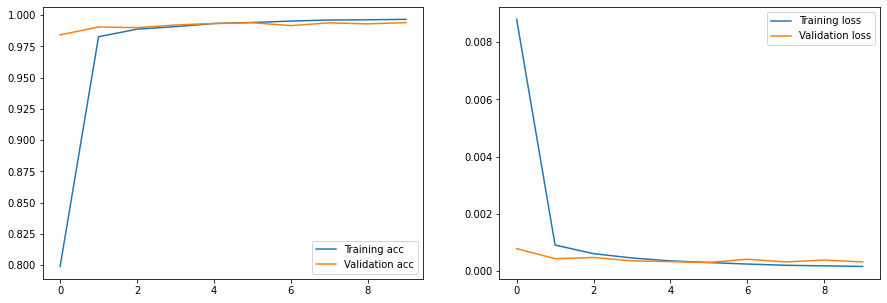

In [13]:
plot_results(hist)